**`NGONG CLOVIS KAH`**, `17F2617` et `clovis.ngong@facsciences-uy1.cm` 


Department of Physics - Faculty of Science - University of Yaoundé I

`NUCLEAR PHYSICS`

`10/07/2023`

Le **2,5,8,11-tétrakis(4-(9H-carbazol-9-yl)phényle)-6,7-diisopropylnéryl-1,4,5,8,9,11-hexaazatriphénylène** ou 4CzIPN, est repertorié dans la base de donnée PubChem comme le composé 102198498.

Cette molécule présente des propriétés intéressantes pour les applications OLED en raison de sa haute efficacité lumineuse, de sa longue durée de vie et de sa stabilité thermique. Elle a été largement utilisée dans les écrans OLED pour les téléviseurs, les smartphones et les ordinateurs portables en raison de ses performances optimales et de sa faible consommation d'énergie.

1. A partir de site de [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498), donner, **dans votre cahier de composition**, sa formule moléculaire et son poids moléculaire.
2. Utiliser `rdkit.Chem.MolFromSmiles` et `rdkit.Chem.AllChem` pour représenter en 2D, y compris explicitement les atomes d'hydrogènes, la molécule 4CzIPN à partir de son SMILES isomérique, disponible sur [pubchem](https://pubchem.ncbi.nlm.nih.gov/compound/102198498). 
3. Utiliser `rdkit.Chem.Descriptors` pour évaluer les propriétés physico-chimique suivantes de la molécule 4CzIPN : le poids moléculaire; poids moléculaire moyen de la molécule en ignorant les hydrogènes; logP ou solubilité, TPSA ou la polarité, nombre de liaisons donneurs d'hydrogènes  et nombre de liaisons accepteurs d'hydrogènes. Utiliser `pandas`pour présenter les résulats sous forme de tableau. **Noter les valeurs obtenues dans votre cahier de composition.**
4. Utiliser `rdkit.Chem.AllChem` et `rdkit.Chem.MolToXYZFile` pour écrire, à partir de `mol` (molécule rdkit) de la question 2. dans un fichier `"votre_nom_4CzIPN.xyz"`, les coordonnées au format xyz de la molécule 4CzIPN. 
   
   ```python
    rdkit.Chem.AllChem.EmbedMolecule(mol)
    rdkit.Chem.AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    rdkit.Chem.MolToXYZFile(mol, 'votre_nom_4CzIPN.xyz')
    ```

5. Ouvrir le fichier créé et **noter dans votre cahier de composition, le chiffre se trouvant au début du fichier**. Ensuite l'effacer du fichier et sauvegarder celui-ci.
6. Utiliser `pyscf.gto` pour créer 
   
   ```python
   CzIPN_mol = pyscf.gto.M(atom=open('votre_nom_4CzIPN.xyz').read(),
    charge=0,
    spin=0,
    basis='631g*',
    unit='Angstrom')
    ```

    et par la méthode `CzIPN_mol.build().get_enuc()`, obtenir la valeur de l'énergie nucléaire de la molécule et **noter celle-ci dans votre cahier de composition**.
7. Le Hamiltonien 2-qubits de cette molécule est
\begin{equation*} \mathtt{H} = h_1(\mathtt{I}\otimes\mathtt{I}) + h_2(\mathtt{Z}\otimes\mathtt{I} - \mathtt{I}\otimes\mathtt{Z}) + h_3(\mathtt{Z}\otimes\mathtt{Z}) + h_4(\mathtt{x}\otimes\mathtt{X}) + h_5(\mathtt{X}\otimes\mathtt{I} + \mathtt{I}\otimes\mathtt{X}) + h_6(\mathtt{X}\otimes\mathtt{Z} - \mathtt{Z}\otimes\mathtt{X}),
\end{equation*}
où les coefficients 
\begin{align*}
&h_1 = -0.46959492273396025,&&h_2 = -0.12480163590374627,\\
&h_3 = -0.026903253444563915,&&  h_4 = 0.004924575935052124,\\
&h_5 = -4.6840929608197336e-06,&& h_6 = - 4.683976972721447e-06.
\end{align*}
Utiliser, pour calculer l'état fondamental de la molécule 4CzIPN,
* `qiskit.opflow.operator_globals` et 
* `qiskit.algorithms.minimum_eigensolvers.NumPyMinimumEigensolver`.

**Noter dans votre cahier de composition, la valeur propre et le vecteur propre de l'Hamiltonien**.

In [35]:
###Answer to Question 1
### Import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
################################################################################
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, PandasTools, Descriptors

#### The formular of the above requested molecule is C56H32N6  and the molecular Weight demanded is 788.9 g/mol

In [66]:
###Answer to Qestion 2

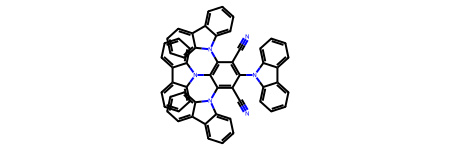

In [36]:
smi = 'C1=CC=C2C(=C1)C3=CC=CC=C3N2C4=C(C(=C(C(=C4C#N)N5C6=CC=CC=C6C7=CC=CC=C75)N8C9=CC=CC=C9C1=CC=CC=C18)N1C2=CC=CC=C2C2=CC=CC=C21)C#N'
m = Chem.MolFromSmiles(smi)
m

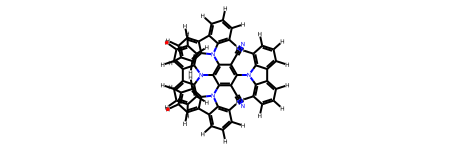

In [37]:
m1 = AllChem.AddHs(m)
m1

In [38]:
molwt = Descriptors.ExactMolWt(m)
logP = Descriptors.MolLogP(m)
hbd = Descriptors.NumHDonors(m)
hba = Descriptors.NumHAcceptors(m)
tpsa = Descriptors.TPSA(m)
qed = Chem.QED.qed(m)
print(f'Our molecular properties are:\n Molecular weight:{molwt}, \t poids moleculaire moyen:{qed}, \t numbre de liaisons donneurs:{hbd}, \t nombre de laisons accepteurs:{hba}, \t polarity:{tpsa}, \t solubility:{logP}')

Our molecular properties are:
 Molecular weight:788.268845024, 	 poids moleculaire moyen:0.17820432764363198, 	 numbre de liaisons donneurs:0, 	 nombre de laisons accepteurs:6, 	 polarity:67.3, 	 solubility:13.818359999999974


In [39]:
def calculate_descriptors(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = Descriptors.NumHDonors(m)
    hba = Descriptors.NumHAcceptors(m)
    psa = Descriptors.TPSA(m)
    qed = Chem.QED.qed(m)
    return [mw, logp, hbd, hba, psa, qed]

In [40]:
molecule = df.iloc[:, 1].values
descriptors = [calculate_descriptors(mol) for mol in molecule]

NameError: name 'df' is not defined

In [41]:
data = pd.concat([df, descriptors_df], axis=1)
data

NameError: name 'df' is not defined

In [52]:
# Answer to Question 7

In [53]:
from rdkit import Chem
from rdkit.Chem import AllChem

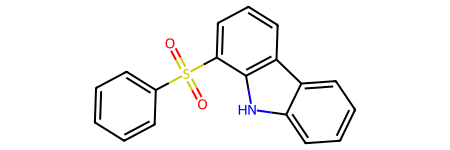

In [54]:
smi = 'C1=CC=C(C=C1)S(=O)(=O)C2=CC=CC3=C2NC4=CC=CC=C34'
m = Chem.MolFromSmiles(smi) 
m

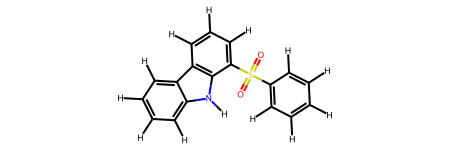

In [55]:
m1 = AllChem.AddHs(m)
m1

In [56]:
from qiskit.opflow.operator_globals import I, X, Y, Z
from qiskit.algorithms import NumPyMinimumEigensolver

In [57]:
a=I^I
print(a)

II


In [58]:
b=((Z^I)-(I^Z))
print(b)

1.0 * ZI
- 1.0 * IZ


In [59]:
c=(Z^Z)
print(c)

ZZ


In [60]:
d=X^X
print(d)

XX


In [61]:
e=(X^I)+(I^X)+(X^Z)-(Z^X)
print(e)

1.0 * XI
+ 1.0 * IX
+ 1.0 * XZ
- 1.0 * ZX


In [62]:
H = (-0.518418*a) -0.136555*b -0.025866*c+(0.015725*d)-0.000296*e
print(H)

-0.518418 * II
- 0.136555 * ZI
+ 0.136555 * IZ
- 0.025866 * ZZ
+ 0.015725 * XX
- 0.000296 * XI
- 0.000296 * IX
- 0.000296 * XZ
+ 0.000296 * ZX


In [63]:
exact_result = NumPyMinimumEigensolver().compute_minimum_eigenvalue(H)
print(f'The exact ground state energy is: {exact_result.eigenvalue}')

The exact ground state energy is: -0.76611433121474


In [64]:
import rdkit
import pyscf
print(rdkit.__version__)
print(pyscf.__version__)

2022.09.5
2.2.1


In [67]:
rdkit.Chem.AllChem.EmbedMolecule(m)
rdkit.Chem.AllChem.MMFFOptimizeMolecule(m, maxIters=200)
rdkit.Chem.MolToXYZFile(m, 'ngong_clovis_4CzIPN.xyz')

[13:29:34] Molecule does not have explicit Hs. Consider calling AddHs()
[13:29:34] Molecule does not have explicit Hs. Consider calling AddHs()


In [65]:
import qiskit.tools.jupyter
%qiskit_version_table